In [1]:
#DSCI 100 Group Project

**Introduction:** 

Our group project will be utilizing the Heart Disease dataset. This dataset tracks various risk factors that individuals with heart disease have, such as: 

(1) Age: age of the patient. 

(2) Sex: biological gender of the patient
    1 = males
    2 = females 

(3) Chest Pain Type (cp): gives a number that correlates with a type of chest pain. For reference, angina is defined as chest pain that is due to a decrease of blood flowing to the heart. 
    1 = typical angina
    2 = atypical angina
    3 = non-anginal pain
    4 = asymptomatic

(4) Resting Blood Pressure (trestbps): measuring the amount of time it takes for the blood to flow back into an artery after momentarily cutting off the blood flow. 

(5) Cholesterol Level (measured in mg/dl): 

(6) Fasting Blood Sugar (fbs): records whether the patient's blood sugar was greater or less than 120 mg/dl. 
    1 = greater than 120 mg/dl
    0 = less than 120 mg/dl

(7) Resting Electrocardiographic Result (restecg): for reference, an electrocardiogram is a measurement of the electrical signals going to the heart. 
    0 = normal
    1 = ST-T abnormality
    2 = left ventricular hypertrophy

(8) Maximum Heart Rate of the patient (thalach): measures the fastest recorded rate of the patient's heart in beats per minute (bpm). 

(9) Exercise Induced Angina (exang): 
    1 = yes. 
    2 = no

(10) ST Depression Induced by Exercise (oldpeak)

(11) Slope of the Peak of the Exercise Electrocardiogram (slope)

(12) Number of major vessels coloured by fluoroscopy (ca): a fluoroscopy is a procedure where dye is injected into the patient's bloodstream, and an x-ray is conducted to view how the blood is flowing through the vascular system. This is recorded in the data set on a scale of 0-3. 

(13) Thalassemia (thal): a blood disorder that is marked by reduced hemoglobin. 
    3 = normal
    6 = fixed defect
    7 = reversible defect 

(14) Diagnosis of heart disease (num): states whether the patient was given the status of having an angiographic disease. 
    0 = no heart disease
    1, 2, 3, 4 = heart disease

This data can have a tremendous impact on the ability to diagnose heart disease and identify risk factors in individuals who have not yet presented with heart disease. Our group will be answering the predictive question: Can we predict a diagnosis of heart disease based on an individual's age and cholesterol levels?

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,chol,num
<dbl>,<dbl>,<chr>
63,233,0
67,286,1
67,229,1
⋮,⋮,⋮
57,131,1
57,236,1
38,175,0


age_mean,chol_mean,age_sd,chol_sd
<dbl>,<dbl>,<dbl>,<dbl>
54.33921,249.0441,8.70329,54.25813


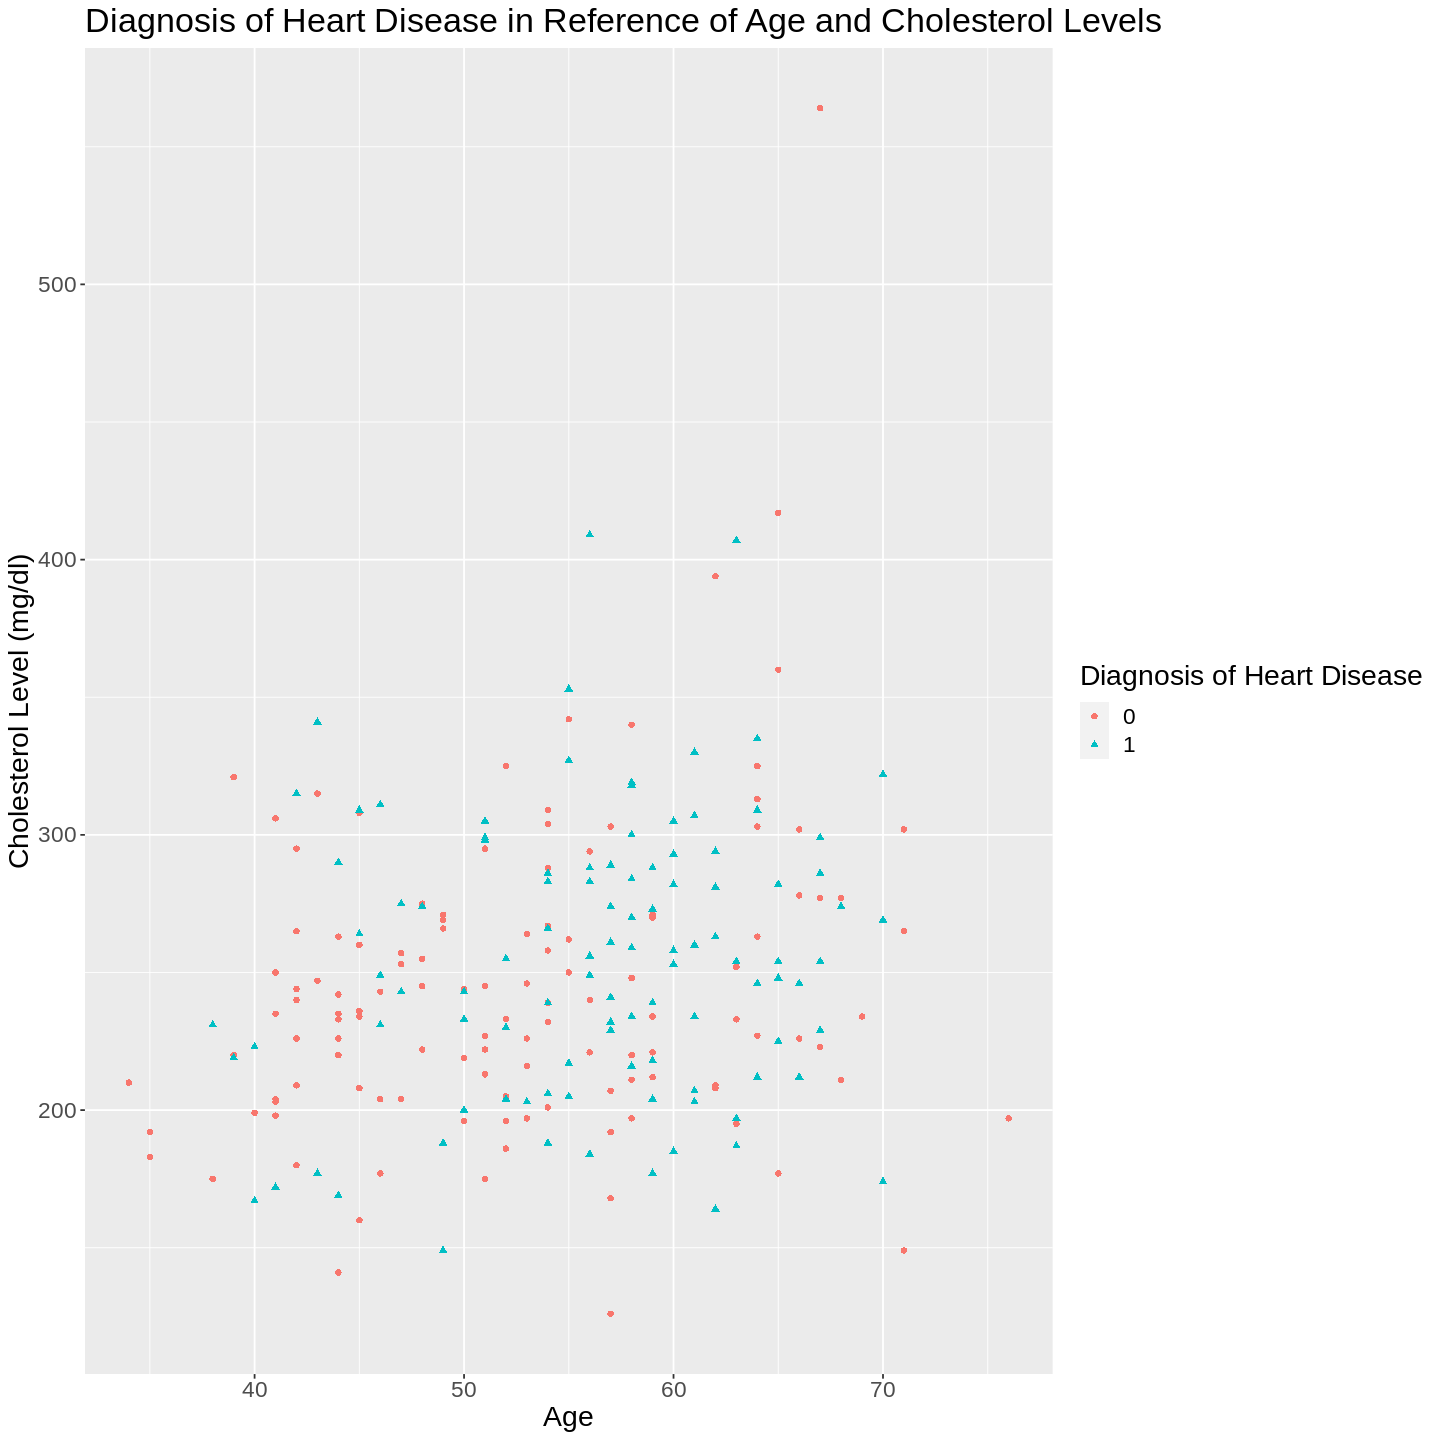

In [4]:
cleveland_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", 
                           col_names = c("age", "sex", "cp", "trestbps", 
                                         "chol", "fbs", "restecg", "thalach", 
                                         "exang", "oldpeak", "slope", "ca", "thal", "num")) 
cleveland_data <- cleveland_data |>
    mutate(num = as_factor(num)) |>
    mutate(num = case_when(num %in% c(1, 2, 3, 4) ~ "1", num %in% 0 ~ "0"))
cleveland_data_reduced <- cleveland_data |>
    select(age, chol, num)
cleveland_data_reduced
set.seed(2002) #do not change this!!!
cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = num)
cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)
summary_table <- cleveland_training |>
    select(age, chol, num) |>
    summarize(age_mean = mean(age, na.rm = TRUE), chol_mean = mean(chol, na.rm = TRUE),
             age_sd = sd(age, na.rm = TRUE), chol_sd = sd(chol, na.rm = TRUE))
summary_table
options(repr.plot.width = 12, repr.plot.height = 12)
plot <- cleveland_training |>
    ggplot(aes(x = age, y = chol, color = num, shape = num)) +
    geom_point() + 
    labs(x = "Age", y = "Cholesterol Level (mg/dl)", color = "Diagnosis of Heart Disease", shape = "Diagnosis of Heart Disease") +
    ggtitle("Diagnosis of Heart Disease in Reference of Age and Cholesterol Levels") +
    theme(text = element_text(size = 17))
plot

**Comments:** The first table is reduced version of the dataset, containing only the values that we will be unsing during this analysis; age, chol, and num. The second table is a summary table that depicts the mean age and mean cholesterol levels of the individual observations in the dataset, as well as the standard deviation of the age and cholesterol levels. This gives us an idea of the shape of our dataset. The graph is a scatterplot of cholesterol level vs age, with the diagnosis of heart disease displayed via colour and shape. As can be seen in the graph, the relationship between cholesterol and age appears to be non-linear and not strong. Furthermore, there doesn't appear to be a strong relationship between cholesterol level and heart disease diagnosis, or age and heart disease diagnosis. 

**Method**: To complete our data analysis, we will be using K -nearest neighbors classification. Through cross-validation of the training dataset, we will choose the optimal K. which we will use to train our data. The class that we will be predicting is the variable num, an integer-valued from 0 (no presence) to 4, which gives the diagnosis of heart disease based on angiographic disease status. The variables that we will use to predict the class are age (in years), and cholesterol levels. We will then use the testing data set to evaluate the accuracy of our model. If the accuracy is above 80% accuracy, then our chosen variable of age and cholesterol levels will be a significant contributor to the diagnosis of heart disease. 


**Expected Outcomes and Significance**: Individuals with a higher age range have a higher risk of having heart disease. By conducting data analysis, it will be helpful in assisting the diagnosis of heart disease. Having a classification model which predicts heart diseases based on age and cholesterol can greatly reduce the medical resources used to formally diagnose such diseases, for example, if the model indicates a 99% chance of negative on a patient, and without other symptoms present, it could be an indication that the patient is healthy. Furthermore, the model can be used as an indicator for patients to receive formal medical attention and formal medical treatment, which could help with an early-stage diagnosis of certain heart diseases, and treat those diseases in a time-efficient manner. As seen in the data set, it could lead to discovering more factors that could result in heart diseases, such as cholesterol levels, smoking, history of diabetes and coronary heart disease, and more. 
